## **KNN Theory and Deep Dive**

**Things you will learn in this notebook:**
* Implementation of KNN from scratch and using SK learn.
* Hyperparameter tuning and selection of optimum value of K.
* Time complexity of KNN algorithm.
* Underfitting and Overfitting of KNN algo with respect to K value selected.
* Impact of Outliers on KNN algorithm.
* Weighted Knn.

This notebook can be used to quickly revise the KNN algorithm.
                                
**1. Introduction** :
 KNN is a simple, intuitive, and versatile machine learning algorithm used for both classification and regression tasks. It's based on the principle that similar data points tend to have similar labels or target values.
 
 **2. Algorithm Overview** :
Given a dataset with labeled data points, KNN classifies new data points or predicts their target values based on the majority vote (for classification) or average (for regression) of their k nearest neighbors.
In this notebook we are just looking at the classificatio part.

**3. Steps of KNN Algorithm** :


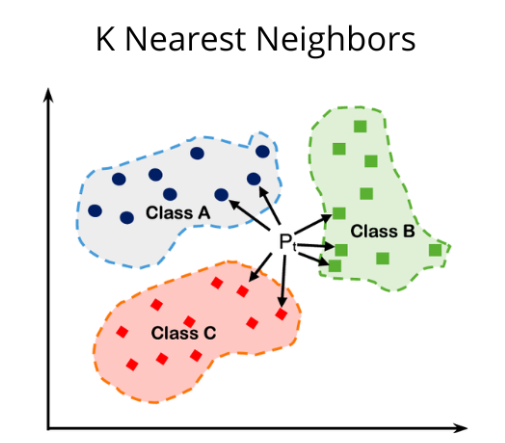

 Step 1: 
* Load the dataset containing labeled data points.
* Each data point has features (attributes) and a corresponding class label (for   classification) 

Step 2: 
* Choose the value of K, the number of nearest neighbors to consider.
* Choosing k is crucial and can affect the model's performance.

Step 3: 
* Normalize the attributes or features using either standard scaler or minmax scaler.
* Normalization is important in distance based algorithms, KNN is a distance based algorithm which will be explained in the notebook subsequently.

Step 4:
* Iterate the dataset and calculate the distance of each datapoint from all the datapoints and store them in a list.
* The distance calculated can be euclidean distance or manhattan distance or even cosine similarity distance.
* The type of distance depends on the number points in the dataset. If you have a very large dataset with many data points and in very high dimensions then calculating the euclidean distance if very computationally expensive (because of square root) so in such cases you can prefer manhattan distance or cosine similarty distance which are not that computationally expensive.

Step 5:
* Sort the distances in ascending order to find the K nearest neighbours.
* The best sorting algorithm takes n*log(n) time complexity.

Step 6:
* Determine the class labels of the k nearest neighbors.
* Assign the class label that appears most frequently (mode) among the k neighbors to the query point.

Step 7:
* Output the predicted class label for classification.


### Importing Libraries

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt 
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing dataset
df = pd.read_csv("/kaggle/input/blinkit-knn/blinkit_multiclass.csv")
df.head()

,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,class
0,3,12669,9656,7561,214,2674,1338,2
1,3,7057,9810,9568,1762,3293,1776,2
2,3,6353,8808,7684,2405,3516,7844,2
3,3,13265,1196,4221,6404,507,1788,1
4,3,22615,5410,7198,3915,1777,5185,1


### Data Description:

* feature -> Description
* Region -> where the store is located (1: Tier-1 city, 2: Tier-2 city, 3:Tier-3 city)
* Fresh -> purchase history of Fresh food
* Milk -> purchase history of milk product
* Grocery -> purchase history of Grocery
* Frozen -> purchase history of Frozen food
* Detergents_Paper -> purchase history of washing products
* Delicassen -> purchase history of imported products, cooked meat
* class -> Store catgeory based on demand on products

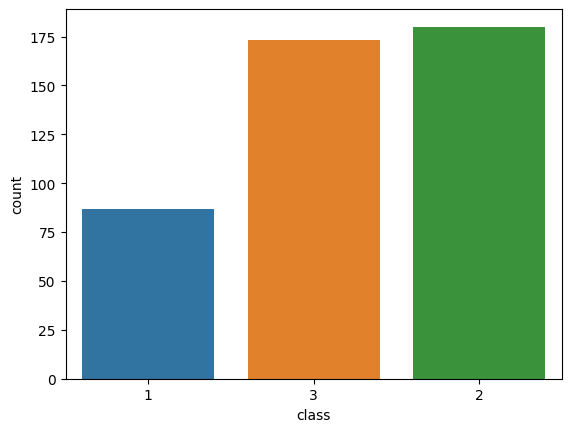

In [3]:
## Let's check the different classes present in the dataset
sns.countplot(data=df,x='class',order = [1,3,2])
plt.show()

In [4]:
# Separating the attributes (X) and labels (Y)
df_copy = df.copy()
X = df_copy.drop(columns='class')
y = df_copy[['class']] # Using double box brackets as I wanted to keep both X and y as dataframes and not series.

### Things to remember while selecting K (Hyperparameter)

* K should not be the multiple of number of classes. Let me break this down- In this dataset there are 3 classes and suppose I took my K as 6, so when I check the classes of my 6 neighbours for a particular datapoint let's say 2 are from class 1, 2 are from class 2 and the other 2 are from class 3, here there is no majority so what class will you predict for the datapoint with such neighbours. 
**Hence the solution to above problem is, to not to take the K as multiple of number of classes**

### Overfitting and underfitting while selection of K

**Very small value of K**: 
* When K is small, the model relies heavily on the nearest neighbors, potentially capturing noise or outliers in the training data.

* With small K, the decision boundary becomes more complex, capturing local fluctuations in the data rather than general trends.

* Very small K leads to high variance.

* With very small K, the model may achieve low training error by fitting the noise in the training data, but it may perform poorly on unseen data.

**Very large value of K**:
* When K is large, the decision boundary becomes smoother and more generalized.

* The model relies on a larger number of neighbors, leading to a simpler decision boundary that may not capture the underlying patterns in the data well.

* This increased bias can cause the model to systematically under-predict or under-fit the data. (High Bias)

* The model may struggle to fit even the training data properly, let alone generalize to unseen data.

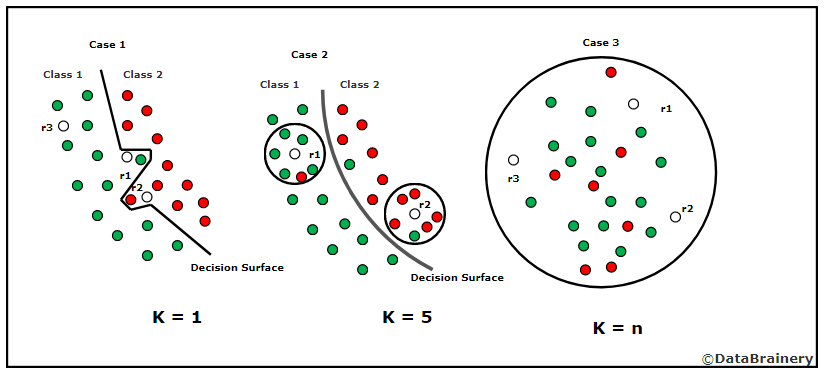

The same can be seen in the image above:
* When K is very less i.e 1, it is overfitting by segregating even 1 or 2 outliers we have.
* When K is 5, it is optimum and fits perfectly.
* When K is very large i.e n(number of datapoints), it generalizes and always predicts the output has majority class instead of caputring underlying pattern which indicates underfitting.

 ### Checking Assumption of KNN
 - The major assumption of KNN is that similar datapoints stay together.
 - Let's visualize whether similar datapoints are together visually.
 - Since we cannot visualize more than 2 dimensions let's use PCA (Principal component analysis) to reduce the dataset into 2 dimensions and then visualize the same.
 

In [5]:
pca = PCA(n_components=2)
print(X.shape)
X = pca.fit_transform(X)
print(X.shape)

(440, 7)
(440, 2)


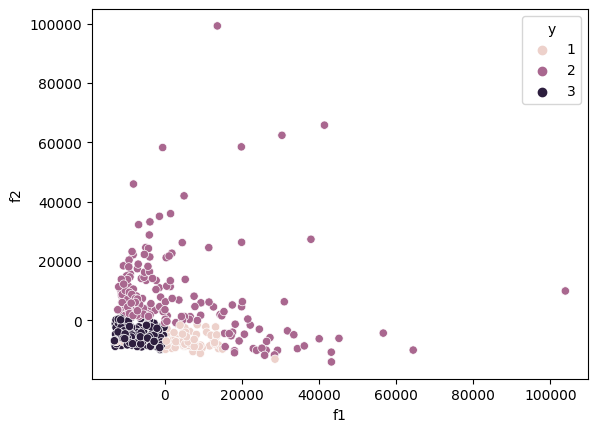

In [6]:
df2 = pd.DataFrame({'f1':X[:,0],'f2':X[:,1]})
df2['y']=y
sns.scatterplot(data=df2,x='f1',y='f2',hue='y')
plt.show()

* As we can see the above plot, we can tell that data points belong to a particular class are closely packed. 
* This implies we can use KNN for modelling this dataset and for subsequently for predicting the class of a new datapoint.

In [7]:
# Splitting data into training, cross validation and test set.

X_train_val,X_test,y_train_val,y_test = train_test_split(X,y.values[:,0],test_size=0.25,random_state=1)
X_train,X_test_val,y_train,y_test_val = train_test_split(X_train_val,y_train_val,test_size=0.2,random_state=1)

In [8]:
# Shapes
print(X_train.shape, y_train.shape)
print(X_test_val.shape, y_test_val.shape)
print(X_test.shape, y_test.shape)

(264, 2) (264,)
(66, 2) (66,)
(110, 2) (110,)


In [9]:
# Let us standarddize the data
scaler = StandardScaler()
scaler.fit(X_train)
X_train=scaler.transform(X_train)
X_test = scaler.transform(X_test) # We should fit on X_train always and transform X_test and X_validation.
X_test_val = scaler.transform(X_test_val)

### KNN Algorithm Implementation from scratch

In [10]:
def knn(X,y,querypoint,k=5):
    """This function is for predicting the class label of querypoint."""
    dist = np.sqrt(np.sum((querypoint-X)**2,axis=1))
    
    # Storing distance and class labels together 
    distances = [(dist[i],y[i]) for i in range(len(dist))]
    
    #Now we have to sort distances for finding k nearest neighbours
    distances=sorted(distances,key= lambda x: x[0]) #sorting distances i.e the list of tuples of distance and class label corresponding to that datapoint
    
    # K nearest neighbours
    distances = distances[:k]
    
    # converting distances to array
    distances = np.array(distances)
    
    # Finding the majority class label in the nearest neighours
    classes,counts = np.unique(distances[:,1],return_counts=True)
    
    index = counts.argmax()
    predicted_class = classes[index]
    
    return int(predicted_class)

In [11]:
print(f" Actuall class of 50th data point in test dataset is {y_test[50]}")
print(f" Predicted class of 50th data point in test dataset is {knn(X_train,y_train,X_test[50])}")

 Actuall class of 50th data point in test dataset is 2
 Predicted class of 50th data point in test dataset is 2


In [12]:
## Accuracy 
y_pred = []
for i in range(len(y_test)):
    y_pred.append(knn(X_train,y_train,X_test[i])) 
    
y_pred=np.array(y_pred)
print(f" Accuracy = {((y_pred==y_test).sum()/len(y_test))*100}")

 Accuracy = 97.27272727272728


### Let's check the best value of K (Hyperparameter Tuning)

In [13]:
def accuracy_for_k(k):
    y_pred=[]
    for i in range(len(y_test)):
        y_pred.append(knn(X_train,y_train,X_test[i],k=k))
    y_pred=np.array(y_pred)
    return np.round(((y_pred==y_test).sum()/len(y_test))*100,2)

### Let's check the best k value between 1 to 15

In [14]:
k_values=[]
accuracies=[]
max_k = 16
for i in range(1,max_k):
    k_values.append(i)
    accuracies.append(accuracy_for_k(i))

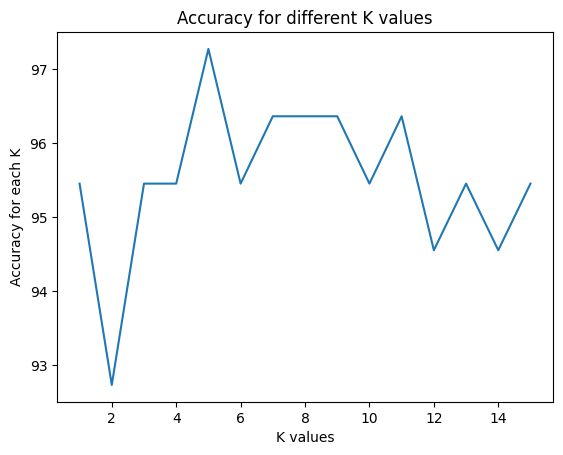

In [15]:
sns.lineplot(x=k_values,y=accuracies)
plt.xlabel("K values")
plt.ylabel("Accuracy for each K")
plt.title("Accuracy for different K values")
plt.show()

### Time complexity of KNN Algorithm
**Training Time complexity**:
* There is no training in KNN all the distances are calculated during the time of prediction therefore the training time complexity is O(1).
* That is why this algorithm is also called lazy learner.

**Testing Time complexity**:
* Since all the distances are calculated during prediction, the testing time complexity of KNN is huge, which is a disadvantage of this, as it would take lot of time for prediction.
* Time complexity for calculating distance between all data points (n- total number of data points) in d dimensions is nd.
* Time complexity for sorting the distances is n*log(n).
* So total time complexity is (nd+n*log(n))

### Impact of outliers on KNN

The impact of outliers on the k-nearest neighbors (KNN) algorithm can vary depending on the value of k. Outliers are data points that are significantly different from the rest of the data in the dataset. Here's how outliers affect the KNN algorithm for different values of k:

**Small k Values (e.g., k=1)**:

**High Sensitivity to Outliers:**
* With small values of k, such as k=1,the algorithm considers only the nearest neighbor to make predictions.
* Outliers that are far away from the majority of the data points can significantly influence the prediction because they can become the nearest neighbor.
* This can lead to misclassification or inaccurate predictions, as the algorithm assigns the same label as the outlier.

**High Variance:**
* Outliers can cause the decision boundary to be highly irregular and sensitive to small changes in the training data.
* The model's performance may be affected by the specific outliers present in the training data.
* This high variance can result in overfitting, where the model fits the noise or outliers in the training data rather than the underlying pattern.

**Large k Values (e.g.,k=small fraction of total samples)**:

**Reduced Sensitivity to Outliers:**
* With larger values of k, the algorithm considers more neighbors when making predictions.
* Outliers have less influence on the majority decision because they are likely to be outvoted by the majority of the non-outlier data points.
* The effect of outliers on predictions diminishes as k increases.

**Increased Bias:**
* Larger values of k result in smoother decision boundaries that are less flexible.
* The model may underfit the data by oversimplifying the decision boundary and ignoring local variations, including outliers.
* This increased bias can lead to poorer performance, especially if the dataset contains important local structures that the model fails to capture.

### Weighted Knn:
In the weighted k-nearest neighbors (KNN) algorithm, instead of treating all k nearest neighbors equally when making predictions, each neighbor's contribution to the prediction is weighted by its distance from the query point. The rationale behind weighted KNN is to give more importance to closer neighbors and less importance to farther neighbors, as closer neighbors are likely to be more similar to the query point.


### Sklearn's Implementation of KNN Algorithm

In [16]:
knn = KNeighborsClassifier
# Metric can be changed to manhattan distance 
knn = KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='uniform')
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)
knn.score(X_test, y_test) # Score gives the accuracy

0.9727272727272728

In [17]:
# Implementation of weighted knn with distance.
knn2 = KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=5,metric='euclidean',weights='distance')
knn2.fit(X_train,y_train)
y_pred2=knn2.predict(X_test)
knn2.score(X_test,y_test)

0.9727272727272728

In [18]:
x_q = [X_test[50]]
y_q = y_test[50]
print(knn.predict(x_q)) # This function predicts class of data point x_q
print(knn.predict_proba(x_q)) # This function gives us a list of m values (m = number of classes), ith value in the list is the probability of data point belonging to ith class
print(knn.kneighbors(x_q)) # This function gives all the distances of 5 neighbours of x_q and their position in the dataset

[2]
[[0. 1. 0.]]
(array([[1.0601015 , 1.31661048, 1.32668318, 1.68686128, 2.08037014]]), array([[ 95,  89, 122,   8, 206]]))
